<a href="https://colab.research.google.com/github/Jasmine216/Group5_ml/blob/master/coursework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#this part mount google drive to colab
import os
import tarfile
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


split images

In [0]:
import zipfile
def extract(tar_path, target_path):
    tar = tarfile.open(tar_path, "r")
    file_names = tar.getnames()
    for file_name in file_names:
        tar.extract(file_name, target_path)
    tar.close()

def un_zip(file_name,target_path):
    zip_file = zipfile.ZipFile(file_name)
    if os.path.isdir(target_path):
        pass
    else:
        os.mkdir(target_path)
    for names in zip_file.namelist():
        zip_file.extract(names,target_path)
    zip_file.close()


In [0]:
extract("/content/drive/My Drive/images.tar","/content/dataset")

In [0]:
un_zip("/content/drive/My Drive/cropped.zip","/content/dataset")

In [0]:
ls /content/dataset/cropped/

test/  train/


In [0]:
import scipy.io
import scipy.io
import numpy as np
import pandas as pd

from tensorflow import keras

import os
import shutil
original_dataset_dir="/content/dataset/Images"
cropped_dataset_dir="/content/dataset/cropped"
base_dir="/content/dataset/Images_New_Path"
if not os.path.exists(base_dir):
    os.mkdir(base_dir)

In [0]:
pip install split-folders

In [0]:
ls /content/dataset/Images_New_Path/

test/  train/  val/


Definition for original images

In [0]:
import split_folders
split_folders.ratio(original_dataset_dir, output=base_dir, seed=1337, ratio=(.8, .1, .1)) # default values
train_dir=os.path.join(base_dir,"train")
validation_dir=os.path.join(base_dir,"val")
test_dir=os.path.join(base_dir,"test")


Definition for cropped images

In [0]:
train_dir=os.path.join(cropped_dataset_dir,"train")
validation_dir=os.path.join(cropped_dataset_dir,"test")

Preprocessing of images

In [0]:
from keras import layers
from keras import models
import PIL

In [0]:
#preprocessing of images
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)
#WAY 1
train_generator=train_datagen.flow_from_directory(train_dir,batch_size=20,target_size=(150,150),class_mode='sparse')
validation_generator=test_datagen.flow_from_directory(validation_dir,batch_size=20,target_size=(150,150),class_mode='sparse')
for i ,j in train_generator:
    print("data batch shape:",i.shape)
    print("label batch shape",j.shape)
    break

In [0]:
#preprocessing of cropped images
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)
#WAY 1
train_generator=train_datagen.flow_from_directory(train_dir,batch_size=20,target_size=(299,299),class_mode='sparse')
validation_generator=test_datagen.flow_from_directory(validation_dir,batch_size=20,target_size=(299,299),class_mode='sparse')
for i ,j in train_generator:
    print("data batch shape:",i.shape)
    print("label batch shape",j.shape)
    break

Found 12000 images belonging to 120 classes.
Found 8580 images belonging to 120 classes.
data batch shape: (20, 299, 299, 3)
label batch shape (20,)


Xception model

In [0]:

from tensorflow import keras
model=keras.applications.xception.Xception(include_top=True, weights='imagenet',
                                    input_tensor=None, input_shape=None,
                                    pooling=None, classes=1000)
model.summary()



Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

Fit Xception model using original images.

In [0]:
#fit_model
from keras import optimizers
model.compile(loss = "sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(), metrics = ["accuracy"])
history = model.fit_generator(train_generator,epochs=50,validation_data=validation_generator,steps_per_epoch=372,validation_steps=50,callbacks=early_stopping_cb,)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
372/372 [==============================] - 173s 466ms/step - loss: 6.0295 - accuracy: 0.0137 - val_loss: 4.3267 - val_accuracy: 0.1610
Epoch 2/50
372/372 [==============================] - 173s 464ms/step - loss: 3.3294 - accuracy: 0.2835 - val_loss: 2.0194 - val_accuracy: 0.5298
Epoch 3/50
372/372 [==============================] - 173s 465ms/step - loss: 1.5475 - accuracy: 0.6746 - val_loss: 1.0597 - val_accuracy: 0.7570
Epoch 4/50
372/372 [==============================] - 173s 464ms/step - loss: 0.9506 - accuracy: 0.7848 - val_loss: 0.7552 - val_accuracy: 0.8150
Epoch 5/50
372/372 [==============================] - 172s 464ms/step - loss: 0.6735 - accuracy: 0.8364 - val_loss: 0.5823 - val_accuracy: 0.8450
Epoch 6/50
372/372 [==============================] - 173s 464ms/step - loss: 0.5474 - accuracy: 0.8664 - val_loss: 0.6141 - val_accuracy: 0.8281
Epoch 7/50
372/372 [============================

KeyboardInterrupt: ignored

Fit Xception model using cropped images.

In [0]:
#fit_model
from keras import optimizers
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
model.compile(loss = "sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(), metrics = ["accuracy"])
history = model.fit_generator(train_generator,epochs=30,validation_data=validation_generator,steps_per_epoch=372,validation_steps=30)

Epoch 1/30
372/372 [==============================] - 172s 462ms/step - loss: 6.0583 - accuracy: 0.0086 - val_loss: 4.3261 - val_accuracy: 0.1667
Epoch 2/30
372/372 [==============================] - 170s 458ms/step - loss: 3.3422 - accuracy: 0.2907 - val_loss: 2.0804 - val_accuracy: 0.5867
Epoch 3/30
372/372 [==============================] - 170s 458ms/step - loss: 1.5890 - accuracy: 0.6778 - val_loss: 0.9837 - val_accuracy: 0.8000
Epoch 4/30
372/372 [==============================] - 170s 458ms/step - loss: 0.9159 - accuracy: 0.8019 - val_loss: 0.7310 - val_accuracy: 0.8117
Epoch 5/30
372/372 [==============================] - 171s 459ms/step - loss: 0.6828 - accuracy: 0.8427 - val_loss: 0.6231 - val_accuracy: 0.8433
Epoch 6/30
372/372 [==============================] - 170s 457ms/step - loss: 0.4917 - accuracy: 0.8858 - val_loss: 0.5368 - val_accuracy: 0.8733
Epoch 7/30
372/372 [==============================] - 171s 458ms/step - loss: 0.4021 - accuracy: 0.9054 - val_loss: 0.4476 -

In [0]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)
#WAY 1
train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='sparse')
validation_generator=test_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=20,class_mode='sparse')
for i ,j in train_generator:
    print("data batch shape:",i.shape)
    print("label batch shape",j.shape)
    break


Found 16418 images belonging to 120 classes.
Found 2009 images belonging to 120 classes.
data batch shape: (20, 150, 150, 3)
label batch shape (20,)


The self-created model

In [0]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
model = keras.models.Sequential([                                
    keras.layers.Conv2D(64,(3,3),activation="relu",input_shape=(150,150,3)),
    keras.layers.MaxPool2D(2,2), #(36,36,64)
    keras.layers.Conv2D(128,(3,3),activation="relu"), #(34,34,128)
    keras.layers.MaxPool2D(2,2), #(17,17,128)
    keras.layers.Conv2D(256,(3,3),activation="relu"), #(15,15,128)
    keras.layers.MaxPool2D(2,2), #(7,7,128)
    #keras.layers.Flatten() #7*7*128=6272
    keras.layers.GlobalAveragePooling2D(data_format=None),
    keras.layers.Dense(120,activation="softmax")  
])
model.summary()

ERROR! Session/line number was not unique in database. History logging moved to new session 59
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 256)       0         
___________________________

In [0]:
#fit model
model.compile(loss = "sparse_categorical_crossentropy", optimizer=keras.optimizers.Adam(), metrics = ["accuracy"])
history = model.fit_generator(train_generator,epochs=30,validation_data=validation_generator,callbacks=early_stopping_cb,steps_per_epoch=372,validation_steps=50)

ERROR! Session/line number was not unique in database. History logging moved to new session 60
Epoch 1/30
372/372 [==============================] - 29s 77ms/step - loss: 4.7527 - accuracy: 0.0153 - val_loss: 4.7403 - val_accuracy: 0.0150
Epoch 2/30
372/372 [==============================] - 28s 76ms/step - loss: 4.6934 - accuracy: 0.0200 - val_loss: 4.6658 - val_accuracy: 0.0222
Epoch 3/30
372/372 [==============================] - 28s 76ms/step - loss: 4.6716 - accuracy: 0.0214 - val_loss: 4.6638 - val_accuracy: 0.0220
Epoch 4/30
372/372 [==============================] - 28s 76ms/step - loss: 4.6150 - accuracy: 0.0238 - val_loss: 4.6168 - val_accuracy: 0.0243
Epoch 5/30
372/372 [==============================] - 29s 77ms/step - loss: 4.5759 - accuracy: 0.0317 - val_loss: 4.6034 - val_accuracy: 0.0380
Epoch 6/30
372/372 [==============================] - 28s 76ms/step - loss: 4.5673 - accuracy: 0.0313 - val_loss: 4.5638 - val_accuracy: 0.0344
Epoch 7/30
372/372 [=====================

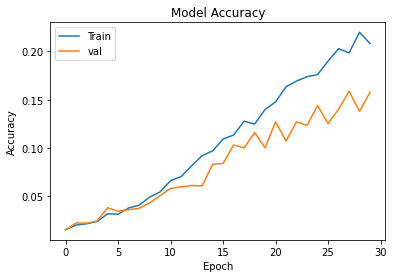

In [0]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','val'], loc='upper left')
plt.show()

Solve the problem of overfitting

1.Data Augmentation+dropout

In [0]:
#Augmemtation for original images
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode="nearest")
test_datagen=ImageDataGenerator(rescale=1./255)
#WAY 1
train_generator=train_datagen.flow_from_directory(train_dir,batch_size=20,target_size=(150,150),class_mode='sparse')
validation_generator=test_datagen.flow_from_directory(validation_dir,batch_size=20,target_size=(150,150),class_mode='sparse')
for i ,j in train_generator:
    print("data batch shape:",i.shape)
    print("label batch shape",j.shape)
    break

In [0]:
#Augmentation for cropped images
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode="nearest")
test_datagen=ImageDataGenerator(rescale=1./255)
#WAY 1
train_generator=train_datagen.flow_from_directory(train_dir,batch_size=20,target_size=(299,299),class_mode='sparse')
validation_generator=test_datagen.flow_from_directory(validation_dir,batch_size=20,target_size=(299,299),class_mode='sparse')
for i ,j in train_generator:
    print("data batch shape:",i.shape)
    print("label batch shape",j.shape)
    break

Found 12000 images belonging to 120 classes.
Found 8580 images belonging to 120 classes.
data batch shape: (20, 299, 299, 3)
label batch shape (20,)


In [0]:
#Xception model
from tensorflow import keras
model=keras.applications.xception.Xception(include_top=True, weights='imagenet',
                                    input_tensor=None, input_shape=None,
                                    pooling=None, classes=1000)
model.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [0]:
#Fit the model using original images
from keras import optimizers
model.compile(loss = "sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(), metrics = ["accuracy"])
history = model.fit_generator(train_generator,epochs=50,validation_data=validation_generator,steps_per_epoch=514,validation_steps=50,callbacks=[reduce_lr])

Epoch 1/50
514/514 [==============================] - 97s 189ms/step - loss: 0.5538 - accuracy: 0.8325 - val_loss: 1.2684 - val_accuracy: 0.6820 - lr: 0.0100
Epoch 2/50
514/514 [==============================] - 96s 187ms/step - loss: 0.5459 - accuracy: 0.8351 - val_loss: 1.3151 - val_accuracy: 0.6502 - lr: 0.0100
Epoch 3/50
514/514 [==============================] - 96s 187ms/step - loss: 0.5125 - accuracy: 0.8446 - val_loss: 1.2723 - val_accuracy: 0.6820 - lr: 0.0100
Epoch 4/50
514/514 [==============================] - 96s 187ms/step - loss: 0.5119 - accuracy: 0.8498 - val_loss: 1.2128 - val_accuracy: 0.6613 - lr: 0.0100
Epoch 5/50
514/514 [==============================] - 96s 187ms/step - loss: 0.4918 - accuracy: 0.8495 - val_loss: 1.2468 - val_accuracy: 0.6870 - lr: 0.0100
Epoch 6/50
514/514 [==============================] - 97s 188ms/step - loss: 0.4471 - accuracy: 0.8629 - val_loss: 1.3022 - val_accuracy: 0.6754 - lr: 0.0100
Epoch 7/50
514/514 [==============================] 

In [0]:
#Fit the model using cropped images
from keras import optimizers
reduce_lr=keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=10, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
model.compile(loss = "sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(), metrics = ["accuracy"])
history = model.fit_generator(train_generator,epochs=30,validation_data=validation_generator,steps_per_epoch=514,validation_steps=30,callbacks=[reduce_lr])

Epoch 1/30
514/514 [==============================] - 236s 459ms/step - loss: 4.3683 - accuracy: 0.1480 - val_loss: 2.0810 - val_accuracy: 0.4850 - lr: 0.0100
Epoch 2/30
514/514 [==============================] - 235s 456ms/step - loss: 1.8535 - accuracy: 0.5568 - val_loss: 0.9856 - val_accuracy: 0.7617 - lr: 0.0100
Epoch 3/30
514/514 [==============================] - 234s 456ms/step - loss: 1.1573 - accuracy: 0.7028 - val_loss: 0.6750 - val_accuracy: 0.8000 - lr: 0.0100
Epoch 4/30
514/514 [==============================] - 235s 456ms/step - loss: 0.9137 - accuracy: 0.7482 - val_loss: 0.5626 - val_accuracy: 0.8350 - lr: 0.0100
Epoch 5/30
514/514 [==============================] - 235s 456ms/step - loss: 0.7743 - accuracy: 0.7850 - val_loss: 0.5770 - val_accuracy: 0.8400 - lr: 0.0100
Epoch 6/30
514/514 [==============================] - 234s 456ms/step - loss: 0.6959 - accuracy: 0.8039 - val_loss: 0.5683 - val_accuracy: 0.8467 - lr: 0.0100
Epoch 7/30
514/514 [==========================

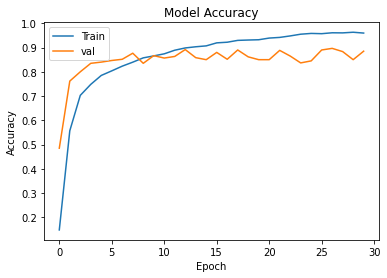

In [0]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','val'], loc='upper left')
plt.show()

2.Feature extraction

1.The features learned by the convolution layer are more general 
2.The dense connection layer does not contain the physical location of the object
3.The layer near the bottom extracts local, highly versatile feature maps
4.More abstract concepts extracted from the layer near the top

1)Feature extraction using Xception+dropout()

In [0]:
# the model for target_size=(150,150)
from tensorflow import keras
conv=keras.applications.xception.Xception(include_top=False, weights='imagenet',
                                    input_shape=(150,150,3)) # "Include_top=False" means it doesn't use dense layer

conv.summary()

83689472/83683744 [==============================] - 0s 0us/step
Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 74, 74, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 74, 74, 32)   0           block1_conv1_bn[0][0]            
__________________________

In [0]:
# the model for target_size=(299,299)
from tensorflow import keras
conv=keras.applications.xception.Xception(include_top=False, weights='imagenet',
                                    input_shape=(299,299,3)) # "Include_top=False" means it doesn't use dense layer

conv.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

We cannot use data augmentation here because each image only enter the convolution layer once, 

In [0]:
# the feature selection for target_size=(150,150)
from keras.preprocessing.image import ImageDataGenerator
data_gen=ImageDataGenerator(rescale=1./255)
batch_size=20
def exact_features(directory,sample_count):
    features=np.zeros(shape=(sample_count,5,5,2048)) # last layer of xception is (5,5,2048)
    labels=np.zeros(shape=(sample_count))
    generator=data_gen.flow_from_directory(
        directory,
        target_size=(150,150),
        batch_size=batch_size,
        class_mode='sparse'
    )
    i=0
    for input_batch,labels_batch in generator:
        features_batch=conv.predict(input_batch)
        features[i*batch_size:(i+1)*batch_size]=features_batch
        labels[i*batch_size:(i+1)*batch_size]=labels_batch
        i+=1
        if i*batch_size>=sample_count:
            break
    return features,labels

In [0]:
# the feature selection for target_size=(299,299)
from keras.preprocessing.image import ImageDataGenerator
data_gen=ImageDataGenerator(rescale=1./255)
batch_size=20
def exact_features(directory,sample_count):
    features=np.zeros(shape=(sample_count,10,10,2048)) # last layer of xception is (5,5,2048)
    labels=np.zeros(shape=(sample_count))
    generator=data_gen.flow_from_directory(
        directory,
        target_size=(299,299),
        batch_size=batch_size,
        class_mode='sparse'
    )
    i=0
    for input_batch,labels_batch in generator:
        features_batch=conv.predict(input_batch)
        features[i*batch_size:(i+1)*batch_size]=features_batch
        labels[i*batch_size:(i+1)*batch_size]=labels_batch
        i+=1
        if i*batch_size>=sample_count:
            break
    return features,labels

In [0]:
# the feature selection for target_size=(150,150)
train_features,train_labels=exact_features(train_dir,16418)
validation_features,validation_labels=exact_features(validation_dir,2009)
train_features=np.reshape(train_features,(16418,5*5*2048))
validation_features=np.reshape(validation_features,(2009,5*5*2048))

In [0]:
# the feature selection for target_size=(299,299)
train_features,train_labels=exact_features(train_dir,12000)
validation_features,validation_labels=exact_features(validation_dir,8580)
train_features=np.reshape(train_features,(12000,10*10*2048))
validation_features=np.reshape(validation_features,(8580,10*10*2048))

Found 12000 images belonging to 120 classes.


Add Dense

In [0]:
from keras import layers
from keras import models
import PIL


In [0]:
model = keras.models.Sequential([                                
    keras.layers.Dense(256,activation="relu",input_dim=5*5*2048),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(120, activation="softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               13107456  
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               30840     
Total params: 13,138,296
Trainable params: 13,138,296
Non-trainable params: 0
_________________________________________________________________


In [0]:
# fit model for original images
from keras import optimizers
reduce_lr=keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=10, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
model.compile(loss = "sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(), metrics = ["accuracy"])
history = model.fit(train_features,train_labels,epochs=30,validation_data=(validation_features,validation_labels),callbacks=[reduce_lr])

Epoch 1/30
514/514 [==============================] - 3s 6ms/step - loss: 2.2428 - accuracy: 0.4752 - val_loss: 2.8736 - val_accuracy: 0.4171 - lr: 0.0100
Epoch 2/30
514/514 [==============================] - 3s 5ms/step - loss: 1.4719 - accuracy: 0.6156 - val_loss: 1.9574 - val_accuracy: 0.5391 - lr: 0.0100
Epoch 3/30
514/514 [==============================] - 3s 5ms/step - loss: 1.1514 - accuracy: 0.6799 - val_loss: 1.8614 - val_accuracy: 0.5421 - lr: 0.0100
Epoch 4/30
514/514 [==============================] - 3s 5ms/step - loss: 0.9093 - accuracy: 0.7358 - val_loss: 3.6742 - val_accuracy: 0.3997 - lr: 0.0100
Epoch 5/30
514/514 [==============================] - 3s 5ms/step - loss: 0.7319 - accuracy: 0.7818 - val_loss: 1.6999 - val_accuracy: 0.5844 - lr: 0.0100
Epoch 6/30
514/514 [==============================] - 3s 5ms/step - loss: 0.5458 - accuracy: 0.8361 - val_loss: 1.7318 - val_accuracy: 0.5978 - lr: 0.0100
Epoch 7/30
514/514 [==============================] - 3s 5ms/step - lo

In [0]:
# fit model for cropped images--RAM blew up
from tensorflow import keras
from keras import optimizers

reduce_lr=keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=10, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
model.compile(loss = "sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(), metrics = ["accuracy"])
history = model.fit(train_features,train_labels,epochs=30,validation_data=(validation_features,validation_labels),callbacks=[reduce_lr])

NameError: ignored

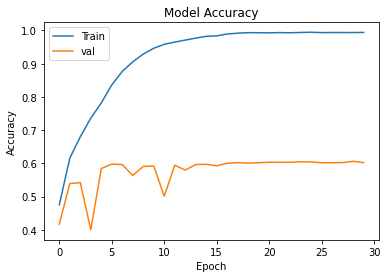

In [0]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','val'], loc='upper left')
plt.show()

2)Change model to inceptionResnet with the deapest layers
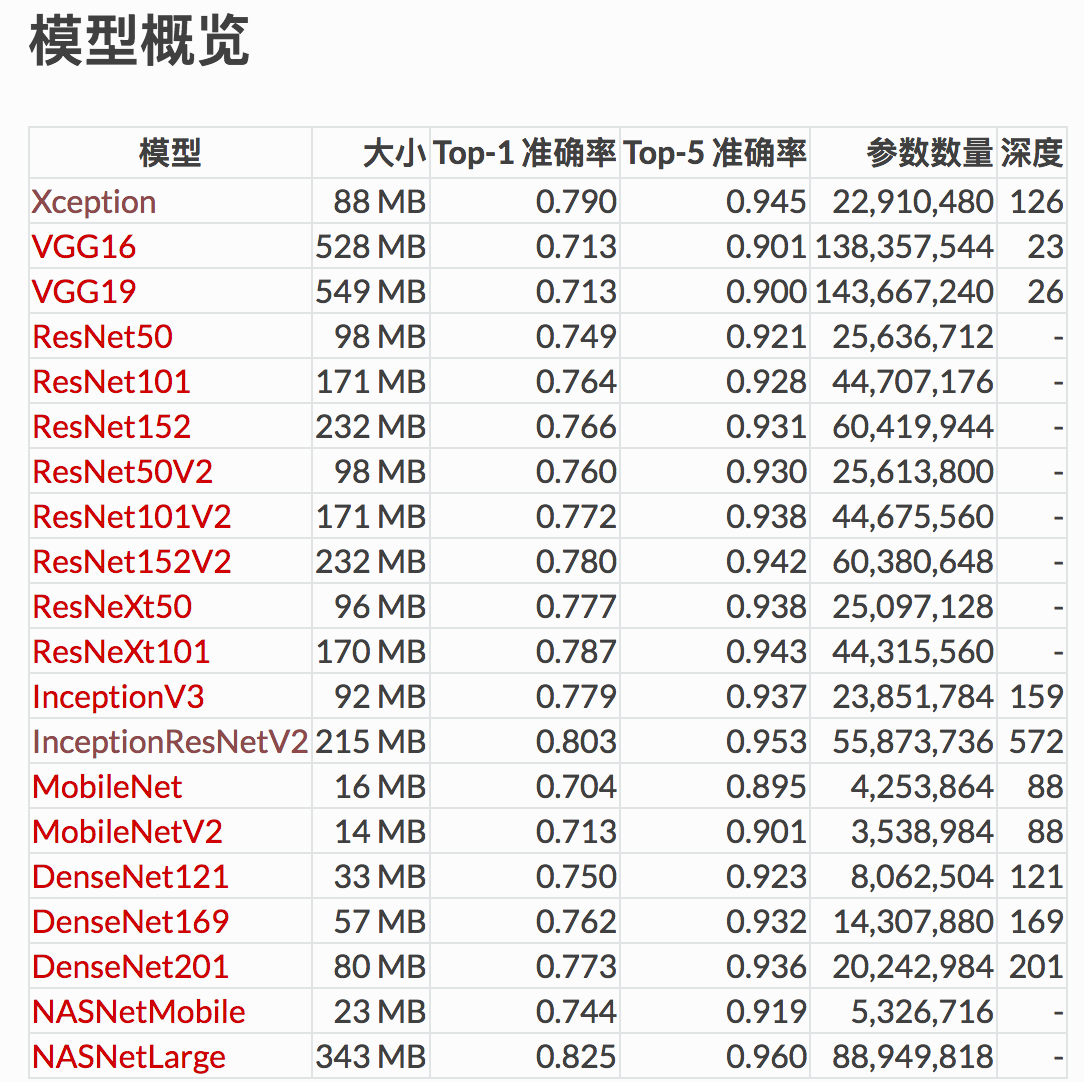

In [0]:
from tensorflow import keras

conv2=keras.applications.inception_resnet_v2.InceptionResNetV2(include_top=False, weights='imagenet',input_shape=(299,299,3))

conv2.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_780 (Conv2D)             (None, 149, 149, 32) 864         input_8[0][0]                    
__________________________________________________________________________________________________
batch_normalization_780 (BatchN (None, 149, 149, 32) 96          conv2d_780[0][0]                 
__________________________________________________________________________________________________
activation_767 (Activation)     (None, 149, 149, 32) 0           batch_normalization_780[0][0]    
________________________________________________________________________________

In [0]:
from keras.preprocessing.image import ImageDataGenerator
data_gen=ImageDataGenerator(rescale=1./255)
batch_size=20
def exact_features(directory,sample_count):
    features=np.zeros(shape=(sample_count,3,3,1536)) # last layer of xception is (5,5,2048)
    labels=np.zeros(shape=(sample_count))
    generator=data_gen.flow_from_directory(
        directory,
        target_size=(150,150),
        batch_size=batch_size,
        class_mode='sparse'
    )
    i=0
    for input_batch,labels_batch in generator:
        features_batch=conv2.predict(input_batch)
        features[i*batch_size:(i+1)*batch_size]=features_batch
        labels[i*batch_size:(i+1)*batch_size]=labels_batch
        i+=1
        if i*batch_size>=sample_count:
            break
    return features,labels

In [0]:
train_features,train_labels=exact_features(train_dir,16418)
validation_features,validation_labels=exact_features(validation_dir,2009)
train_features=np.reshape(train_features,(16418,3*3*1536))
validation_features=np.reshape(validation_features,(2009,3*3*1536))

Found 16418 images belonging to 120 classes.
Found 2009 images belonging to 120 classes.


In [0]:
model = keras.models.Sequential([                                
    keras.layers.Dense(256,activation="relu",input_dim=3*3*1536),
    #keras.layers.Dense(128, activation="relu"),
    #keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(120, activation="softmax")
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 256)               3539200   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               30840     
Total params: 3,570,040
Trainable params: 3,570,040
Non-trainable params: 0
_________________________________________________________________


In [0]:
from keras import optimizers
reduce_lr=keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=10, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
model.compile(loss = "sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(), metrics = ["accuracy"])
history = model.fit(train_features,train_labels,epochs=50,validation_data=(validation_features,validation_labels),callbacks=[reduce_lr])

Epoch 1/50
514/514 [==============================] - 2s 3ms/step - loss: 2.2860 - accuracy: 0.4931 - val_loss: 1.6505 - val_accuracy: 0.5923 - lr: 0.0100
Epoch 2/50
514/514 [==============================] - 2s 3ms/step - loss: 1.5369 - accuracy: 0.6241 - val_loss: 1.6114 - val_accuracy: 0.6197 - lr: 0.0100
Epoch 3/50
514/514 [==============================] - 2s 3ms/step - loss: 1.3426 - accuracy: 0.6551 - val_loss: 3.0355 - val_accuracy: 0.4769 - lr: 0.0100
Epoch 4/50
514/514 [==============================] - 1s 3ms/step - loss: 1.2013 - accuracy: 0.6760 - val_loss: 1.6964 - val_accuracy: 0.6013 - lr: 0.0100
Epoch 5/50
514/514 [==============================] - 1s 3ms/step - loss: 1.0502 - accuracy: 0.7064 - val_loss: 1.5772 - val_accuracy: 0.6257 - lr: 0.0100
Epoch 6/50
514/514 [==============================] - 2s 3ms/step - loss: 0.9282 - accuracy: 0.7282 - val_loss: 1.4714 - val_accuracy: 0.6431 - lr: 0.0100
Epoch 7/50
514/514 [==============================] - 2s 3ms/step - lo

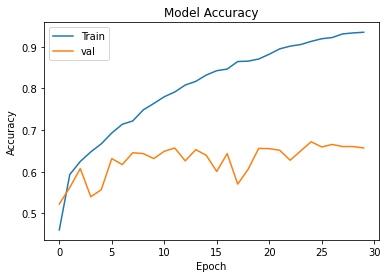

In [0]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','val'], loc='upper left')
plt.show()

Data augmentation

In [0]:
#for original images
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode="nearest")
test_datagen=ImageDataGenerator(rescale=1./255)


train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode="sparse")
validation_generator=test_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=20,class_mode="sparse")

Found 16418 images belonging to 120 classes.
Found 2009 images belonging to 120 classes.


In [0]:
#after cropped
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode="nearest")
test_datagen=ImageDataGenerator(rescale=1./255)


train_generator=train_datagen.flow_from_directory(train_dir,target_size=(299,299),batch_size=20,class_mode="sparse")
validation_generator=test_datagen.flow_from_directory(validation_dir,target_size=(299,299),batch_size=20,class_mode="sparse")

Found 12000 images belonging to 120 classes.
Found 8580 images belonging to 120 classes.


In [0]:
#Conv is definited before- Xception
conv.trainable=False

In [0]:
model = keras.models.Sequential([        
    conv,   
    keras.layers.Flatten(),                     
    keras.layers.Dense(256,activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(120, activation="softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 10, 10, 2048)      20861480  
_________________________________________________________________
flatten (Flatten)            (None, 204800)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               52429056  
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               30840     
Total params: 73,321,376
Trainable params: 52,459,896
Non-trainable params: 20,861,480
_________________________________________________________________


In [0]:
#for original images
from keras import optimizers
reduce_lr=keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=10, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
model.compile(loss = "sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(), metrics = ["accuracy"])
history = model.fit_generator(train_generator,epochs=30,validation_data=validation_generator,steps_per_epoch=514,validation_steps=30,callbacks=[reduce_lr])


Epoch 1/30
514/514 [==============================] - 91s 178ms/step - loss: 3.5040 - accuracy: 0.2267 - val_loss: 1.8578 - val_accuracy: 0.5267 - lr: 0.0100
Epoch 2/30
514/514 [==============================] - 90s 175ms/step - loss: 2.7431 - accuracy: 0.3615 - val_loss: 1.7356 - val_accuracy: 0.5417 - lr: 0.0100
Epoch 3/30
514/514 [==============================] - 90s 175ms/step - loss: 2.6025 - accuracy: 0.3799 - val_loss: 1.8426 - val_accuracy: 0.5033 - lr: 0.0100
Epoch 4/30
514/514 [==============================] - 90s 175ms/step - loss: 2.4411 - accuracy: 0.4046 - val_loss: 1.6034 - val_accuracy: 0.5806 - lr: 0.0100
Epoch 5/30
514/514 [==============================] - 90s 174ms/step - loss: 2.3787 - accuracy: 0.4175 - val_loss: 1.8174 - val_accuracy: 0.5317 - lr: 0.0100
Epoch 6/30
514/514 [==============================] - 91s 176ms/step - loss: 2.3344 - accuracy: 0.4244 - val_loss: 1.6666 - val_accuracy: 0.5617 - lr: 0.0100
Epoch 7/30
514/514 [==============================] 

In [0]:
#after cropped
from keras import optimizers
reduce_lr=keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=10, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
model.compile(loss = "sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(), metrics = ["accuracy"])
history = model.fit_generator(train_generator,epochs=30,validation_data=validation_generator,steps_per_epoch=514,validation_steps=30,callbacks=[reduce_lr])


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
514/514 [==============================] - 247s 481ms/step - loss: 1.7339 - accuracy: 0.5837 - val_loss: 0.5146 - val_accuracy: 0.8433 - lr: 0.0100
Epoch 2/30
514/514 [==============================] - 244s 474ms/step - loss: 1.0523 - accuracy: 0.7161 - val_loss: 0.4712 - val_accuracy: 0.8483 - lr: 0.0100
Epoch 3/30
514/514 [==============================] - 243s 472ms/step - loss: 0.9371 - accuracy: 0.7388 - val_loss: 0.3719 - val_accuracy: 0.8783 - lr: 0.0100
Epoch 4/30
514/514 [==============================] - 244s 475ms/step - loss: 0.8483 - accuracy: 0.7670 - val_loss: 0.3479 - val_accuracy: 0.8900 - lr: 0.0100
Epoch 5/30
514/514 [==============================] - 242s 471ms/step - loss: 0.7904 - accuracy: 0.7691 - val_loss: 0.4249 - val_accuracy: 0.8600 - lr: 0.0100
Epoch 6/30
514/514 [==============================] - 243s 473ms/step - loss: 0.7492 - accuracy: 0.7811 - val_loss: 0.4296 - val_

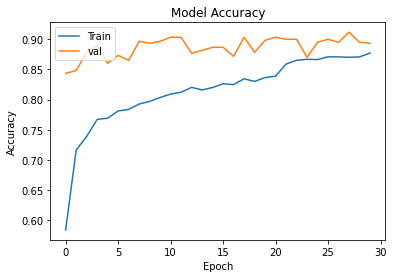

In [0]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','val'], loc='upper left')
plt.show()

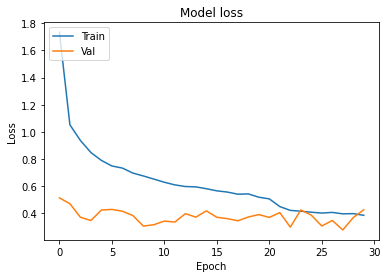

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
#conv2 is definited before--InceptionResnet
conv2.trainable=False
model = keras.models.Sequential([        
    conv2,   
    keras.layers.Flatten(),                     
    keras.layers.Dense(256,activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(120, activation="softmax")
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Model)  (None, 8, 8, 1536)        54336736  
_________________________________________________________________
flatten_4 (Flatten)          (None, 98304)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               25166080  
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 120)               30840     
Total params: 79,533,656
Trainable params: 25,196,920
Non-trainable params: 54,336,736
_________________________________________________________________


In [0]:
# for original images
from keras import optimizers
reduce_lr=keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=10, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
model.compile(loss = "sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(), metrics = ["accuracy"])
history = model.fit_generator(train_generator,epochs=50,validation_data=validation_generator,steps_per_epoch=514,validation_steps=50,callbacks=[reduce_lr])


Epoch 1/50
514/514 [==============================] - 97s 189ms/step - loss: 2.5276 - accuracy: 0.4059 - val_loss: 1.6398 - val_accuracy: 0.5840 - lr: 0.0100
Epoch 2/50
514/514 [==============================] - 93s 181ms/step - loss: 2.4479 - accuracy: 0.4220 - val_loss: 1.5283 - val_accuracy: 0.6148 - lr: 0.0100
Epoch 3/50
514/514 [==============================] - 93s 182ms/step - loss: 2.4078 - accuracy: 0.4263 - val_loss: 1.4950 - val_accuracy: 0.6230 - lr: 0.0100
Epoch 4/50
514/514 [==============================] - 93s 180ms/step - loss: 2.3652 - accuracy: 0.4262 - val_loss: 1.5715 - val_accuracy: 0.5976 - lr: 0.0100
Epoch 5/50
514/514 [==============================] - 93s 180ms/step - loss: 2.3229 - accuracy: 0.4382 - val_loss: 1.4981 - val_accuracy: 0.6190 - lr: 0.0100
Epoch 6/50
514/514 [==============================] - 92s 179ms/step - loss: 2.2873 - accuracy: 0.4413 - val_loss: 1.5162 - val_accuracy: 0.6168 - lr: 0.0100
Epoch 7/50
514/514 [==============================] 

In [0]:
#after cropped
from keras import optimizers
reduce_lr=keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=10, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
model.compile(loss = "sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(), metrics = ["accuracy"])
history = model.fit_generator(train_generator,epochs=30,validation_data=validation_generator,steps_per_epoch=514,validation_steps=30,callbacks=[reduce_lr])


Epoch 1/30
514/514 [==============================] - 271s 527ms/step - loss: 1.7372 - accuracy: 0.6078 - val_loss: 0.3547 - val_accuracy: 0.8883 - lr: 0.0100
Epoch 2/30
514/514 [==============================] - 267s 519ms/step - loss: 0.9957 - accuracy: 0.7474 - val_loss: 0.3764 - val_accuracy: 0.8967 - lr: 0.0100
Epoch 3/30
514/514 [==============================] - 267s 520ms/step - loss: 0.9271 - accuracy: 0.7570 - val_loss: 0.4014 - val_accuracy: 0.8733 - lr: 0.0100
Epoch 4/30
514/514 [==============================] - 266s 517ms/step - loss: 0.8616 - accuracy: 0.7761 - val_loss: 0.3749 - val_accuracy: 0.8950 - lr: 0.0100
Epoch 5/30
514/514 [==============================] - 267s 519ms/step - loss: 0.8237 - accuracy: 0.7774 - val_loss: 0.3615 - val_accuracy: 0.8750 - lr: 0.0100
Epoch 6/30
514/514 [==============================] - 267s 520ms/step - loss: 0.7936 - accuracy: 0.7830 - val_loss: 0.4370 - val_accuracy: 0.8767 - lr: 0.0100
Epoch 7/30
514/514 [==========================

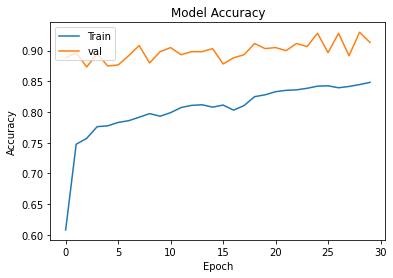

In [0]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','val'], loc='upper left')
plt.show()